In [90]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyoff
from scipy import stats
import matplotlib as mpl
%matplotlib inline

In [91]:
from datetime import timedelta
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from yellowbrick.contrib.scatter import ScatterVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, adjusted_rand_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.manifold import TSNE

In [92]:
customer_tab = pd.read_csv('C:\\Users\\dtulomba\\Documents\\ProjetsCours\\projet5\\olist_customers_dataset.csv\\customer_purchase_info.csv', sep=',')

In [93]:
segment_rfm = pd.read_csv('C:\\Users\\dtulomba\\Documents\\ProjetsCours\\projet5\\olist_customers_dataset.csv\\data_cleaned.csv', sep=',')

In [94]:
customer_tab

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,131.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407572,-45.943353,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,100.00,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114552,d1b1ef27bb2fbdeedc8823febfcc4072,20120882a566b99eb67c104dc05d896f,9336,maua,SP,-23.659848,-46.410127,435361f134c9396bdb0de6ed227fd883,delivered,2017-07-09 15:17:43,...,130.31,cama_mesa_banho,50.0,332.0,2.0,1400.0,37.0,23.0,35.0,bed_bath_table
114553,7dcd626576af9555424051dbdb01cb5a,7c0b4f7719caf8b29a4c8dbd5a1446c9,77370,natividade,TO,-11.709159,-47.725555,9a142fefa71ded6bdc21817299f5ab7c,delivered,2018-06-11 16:10:21,...,435.27,esporte_lazer,26.0,2174.0,3.0,4236.0,68.0,20.0,23.0,sports_leisure
114554,ec5f9c9dd3ff056f05411979267887a5,640ac18151727c99757e30b92253dbc0,5315,sao paulo,SP,-23.532950,-46.731394,f50852b20857fd7ff56126315745e45a,delivered,2018-04-29 17:40:51,...,24.79,casa_construcao,41.0,215.0,6.0,150.0,16.0,7.0,12.0,home_construction
114555,7fb62e47282b83f023cf1fef8d8309c9,48f2f72862e37acc97f50b4484ee2af4,4319,sao paulo,SP,-23.647471,-46.636862,c456339d894d329ad45d39e3d6796b90,delivered,2017-10-17 21:50:00,...,37.68,ferramentas_jardim,34.0,288.0,1.0,600.0,16.0,31.0,18.0,garden_tools


In [95]:
segment_rfm

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92488,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,0,0,0,0,0,0,2,0,0
92489,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,0,0,0,0,1,0,0
92490,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,0,1,0,0,0,0,0,0,0
92491,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,0,0,0,0,0,1,0,0,0


In [96]:
segment_rfm.rename(columns={'Nb_inactive_days':'recency','montant':'monetary'}, inplace=True)

In [97]:
segment_rfm.head(3)

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0


In [98]:
customer_tab.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,latitude,longitude,order_id,order_status,order_purchase_timestamp,...,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,340.50,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [99]:
customer_tab['order_purchase_timestamp'] = pd.to_datetime(customer_tab['order_purchase_timestamp'])

In [100]:
date_min = customer_tab['order_purchase_timestamp'].min()
date_max = customer_tab['order_purchase_timestamp'].max()

In [101]:
date_min

Timestamp('2016-10-03 09:44:50')

In [102]:
date_max

Timestamp('2018-08-29 15:00:37')

In [103]:
(date_max - date_min).days

695

In [104]:
customer_tab.groupby('customer_unique_id')['order_purchase_timestamp'].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_purchase_timestamp, Length: 92501, dtype: int64

In [105]:
dates_commande = customer_tab[['customer_unique_id','order_purchase_timestamp']].copy()
dates_commande.columns = ['customer_unique_id', 'Date_dernière_commande']

In [106]:
dates_commande

,customer_unique_id,Date_dernière_commande
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35
1,452fab1c62b178922fc011b0eb89c1b9,2018-01-11 16:47:03
2,452fab1c62b178922fc011b0eb89c1b9,2018-01-11 16:47:03
3,613259d64ba972e49dc25b019b7918c3,2017-12-07 16:41:50
4,aaad33c5051196b5e73c7d65b9072e1d,2018-03-13 20:11:20
...,...,...
114552,20120882a566b99eb67c104dc05d896f,2017-07-09 15:17:43
114553,7c0b4f7719caf8b29a4c8dbd5a1446c9,2018-06-11 16:10:21
114554,640ac18151727c99757e30b92253dbc0,2018-04-29 17:40:51
114555,48f2f72862e37acc97f50b4484ee2af4,2017-10-17 21:50:00


In [107]:
segment_rfm

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92488,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,0,0,0,0,0,0,2,0,0
92489,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,0,0,0,0,1,0,0
92490,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,0,1,0,0,0,0,0,0,0
92491,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,0,0,0,0,0,1,0,0,0


In [108]:
df = segment_rfm.merge(dates_commande, on = 'customer_unique_id', how = 'inner')

## Méthode retenue

Nous allons calculer le delta de temps entre la première et la dernière commande de notre dataset.


In [117]:
min_date  =orders["order_purchase_timestamp"].min()
max_date=orders["order_purchase_timestamp"].max()

#delta_date = (max_date - min_date).days
delta_date = (date_max - date_min).days
print("Nombre de jours entre la première et la dernière commande : {}".format(delta_date) )

Nombre de jours entre la première et la dernière commande : 695


In [118]:
df

,customer_unique_id,recency,frequency,monetary,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique,Date_dernière_commande,durée_programme,group_jours
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0,2018-05-10 10:56:27,584,38
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0,2018-05-07 11:11:27,581,38
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0,2017-03-10 21:05:03,158,10
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1,2017-10-12 20:29:41,374,24
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1,2017-11-14 19:45:42,407,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114544,fffcf5a5ff07b0908bd4e2dbc735a684,446,2,4134.84,5.0,248.71,27.0,0,0,0,0,0,0,2,0,0,2017-06-08 21:00:36,248,16
114545,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,4.0,19.69,30.0,0,0,0,0,0,0,1,0,0,2017-12-10 20:07:56,433,28
114546,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5.0,22.56,14.0,0,1,0,0,0,0,0,0,0,2017-02-07 15:49:16,127,8
114547,ffff5962728ec6157033ef9805bacc48,118,1,133.69,5.0,18.69,11.0,0,0,0,0,0,1,0,0,0,2018-05-02 15:17:41,576,38


In [134]:
15*12


180

Nous allons pouvoir calculer un indice ARI en fonction du temps pour notre clustering. Nous allons pour cela vieillir artificiellement les données d'un an afin de vérifier leur stabilité. Cela nous permettra d'afficher un graphique de progression de l'indice ARI.

In [136]:
# Importation des bibliothèques nécessaires
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import warnings
warnings.simplefilter("ignore")

# Variables, on a remit ici les mêmes variables que ce de notre meilleur modèle Kmeans 
features = ['recency', 'frequency', 'monetary', 'note_com', 'frais_livraison', 'temps_moyen_livraison']

# Définition du seuil de temps pour les données anciennes
#On prends les 6 derniers mois pour réaliser la simulation de la stabilité du modèle et je prends les données de...
#...la première année pour l'entraînement de mon modèle 
# Les données qui vont venir pour faire la simulation vont venir après la durée de stabilité 
# La durée de stabilité c'est la durée qu'il prends avant que le client ne decroche
# On ne prends que le client qui ont une recense de plus de 180 jours 
duree_stabilité = 15*12 # 180 jours

# Sélection d'un sous-ensemble de données qui viennent après  la duree de stabilité = la durée à laquelle...
#... on teste la stabilité du modèle

données_entrainement = df[(max_date - df['Date_dernière_commande']) >= pd.Timedelta(days=duree_stabilité)]

données_entrainement_scaled = StandardScaler().fit_transform(données_entrainement[features])

# Entreinement du KMeans sur les données anciennes (stable)
kmeans_base= KMeans(n_clusters=4, random_state=0).fit(données_entrainement_scaled)

# Initialisation des listes vides pour les valeurs ARI et les dates
ari_list, days = [], []

#duree_simuation = (695-duree_stabilité)

# Sur ce 6 mois où on fait notre entrainement on va découper par 15aines des jours à chaque fois pour observer ce qu'il se passe..
#... et c'est ça qui nous donne le score ARI 
# Itération à travers les périodes de temps et calcul des valeurs ARI
for i in range(duree_stabilité // 15):

    # Sélection d'un sous-ensemble de données pour la période de temps courante et normalisation
    # On prends les clients qui ont commandé 6 mois avant + 15 jours c'est notre durée d'entrainement et le le 6 mois - 15jours..
    # ... on le laisse pour, df_group = on va rajouter petit à petit le 15 jours et quand on arrive à l'ittération 12 c'est à ...
    # ... que c'est le client qui a commandé il y a 6 mois en arrière 
    df_group = df[(max_date - df['Date_dernière_commande']) + pd.Timedelta(days=i*15) >= pd.Timedelta(days=duree_stabilité)]
    X = StandardScaler().fit_transform(df_group[features])
    
    # Entraînement du modèle de clustering KMeans sur les données actuelles et prédiction des étiquettes
    # kmeans_retrained.predict c'est les labels qu'on obtient après avec le nouveau kmeans, 
    # kmeans_base.predict c'est les labels qu'on a en prédisant avec l'ancien kmeans
    kmeans_retrained = KMeans(n_clusters=5, random_state=0).fit(X)
    labels, labels_true = kmeans_retrained.predict(X), kmeans_base.predict(X)
    
    # Calcul de la valeur ARI et ajout à la liste
    ari_list.append(adjusted_rand_score(labels_true, labels))
    days.append(i * 15)
    
    # Affichage de la valeur ARI pour la période de temps courante
    #print ('Groupe ', df_group['group_jours'].max(), 'avec ', df_group.shape[0], 'données')
    print("ARI pour les données  datant de {} jours : {}".format(i*15, ari_list[-1]))
    
    
    ### Cette simulationc c'est juste pour nous montrer si le client était là le 6 derniers mois, si on arrive à 12 ça veut ..
    ### .. dire que c'est la date de la dernière commande. Si un client a commandé il y a 180 jours, dans la première itération ...
    ### ... si le client a commandé à 180 + 15 on va l'ajouter à une nouvelle tranche et au fur et à mesure pour construire ...
    ### ... le score ARI 
    
    ### Si le score ARI est elevé c'est à dire mon modèle de base est le même que mon nouveau modèle mais quand ça descends ...
    ### ... en dessous de 0.83 c'est à dire qu'il y a 20% de différence , après 4 mois la stabilité du modèle semble être comprise


ARI pour les données  datant de 0 jours : 1.0
ARI pour les données  datant de 15 jours : 0.9888116627379101
ARI pour les données  datant de 30 jours : 0.9804821169723333
ARI pour les données  datant de 45 jours : 0.9844077750948887
ARI pour les données  datant de 60 jours : 0.9794229755861613
ARI pour les données  datant de 75 jours : 0.970971226384718
ARI pour les données  datant de 90 jours : 0.9667001657530785
ARI pour les données  datant de 105 jours : 0.9299513062315543
ARI pour les données  datant de 120 jours : 0.8296125126812074
ARI pour les données  datant de 135 jours : 0.8416118650077875
ARI pour les données  datant de 150 jours : 0.8416118650077875
ARI pour les données  datant de 165 jours : 0.8416118650077875


In [137]:
(max_date - df['Date_dernière_commande'])

0        160 days 06:33:51
1        163 days 06:18:51
2        585 days 20:25:15
3        369 days 21:00:37
4        336 days 21:44:36
                ...       
114544   495 days 20:29:42
114545   310 days 21:22:22
114546   617 days 01:41:02
114547   168 days 02:12:37
114548   532 days 21:11:33
Name: Date_dernière_commande, Length: 114549, dtype: timedelta64[ns]

In [138]:
df.shape    
# Maitenance espacée doit être priviligiée
#- table de jointures.
#- feature.
#- Présentation des k-means pour trois tables.
#- les trois algo de modélisation (silhouette --- temps).
#- Pour DSCAN et ALGO --> Tableau comparatif 
#- Caractérisation et recommandation du meilleur modèle ( radar plot )

(114549, 19)

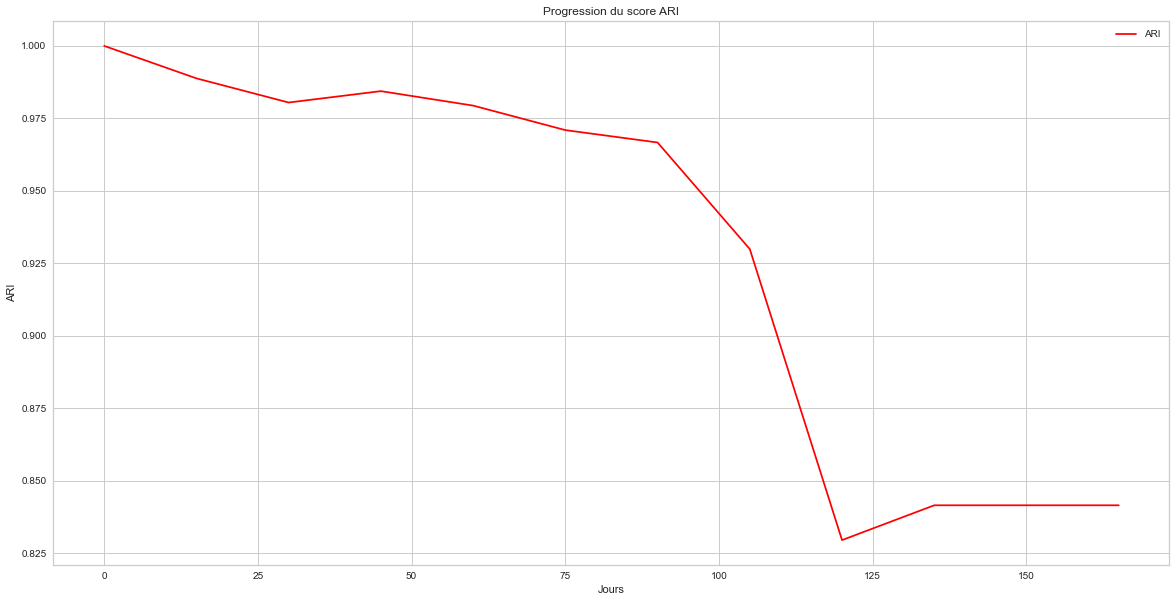

In [139]:
# On affiche le graphique :
plt.figure(figsize=(20,10))
sns.lineplot(x=days, y=ari_list, color='red', label='ARI')
plt.xlabel('Jours')
plt.ylabel('ARI')
plt.title('Progression du score ARI')
plt.show()


A chaque 4 mois on doit mettre à jour le modèle car il y a une baisse drastique au niveau de 4 mois environ -> on descends sous la barre de 0.83 -> Après 4 mois la stabilité du modèle semble être comprise -> il faudra alorsn refaire un nouveau modèle 